In [5]:
import numpy as np
from sklearn.datasets import load_sample_images
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

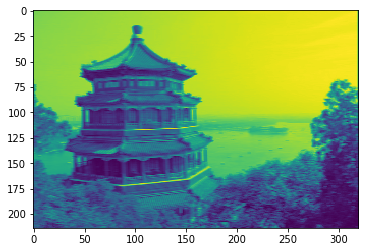

In [9]:
# Load sample images
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape
# Create 2 filters
filters_test = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters_test[:, 3, :, 0] = 1 # vertical line
filters_test[3, :, :, 1] = 1 # horizontal line
# 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides=[1,2,2,1], padding="SAME")
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
plt.imshow(output[0, :, :, 1]) #
plt.show()

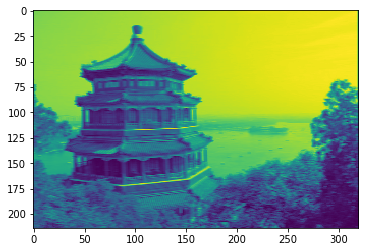

In [12]:
plt.imshow(output[0, :, :, 1])
plt.show()

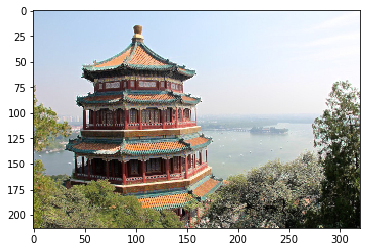

In [18]:

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
plt.imshow(output[0].astype(np.uint8)) 
plt.show()

In [3]:
#testimport matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
sess = tf.Session()

In [4]:
#loading data into  28 by 28 arr
data_dir = 'temp'
mnist = read_data_sets(data_dir)
train_xdata = np.array([np.reshape(x, (28,28)) for x in mnist.
train.images])
test_xdata = np.array([np.reshape(x, (28,28)) for x in mnist.test.
images])
train_labels = mnist.train.labels
test_labels = mnist.test.labels

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting temp\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting temp\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting temp\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting temp\t10k-labels-idx1-ubyte.gz


In [5]:
batch_size = 100
learning_rate = 0.005
evaluation_size = 500
image_width = train_xdata[0].shape[0]
image_height = train_xdata[0].shape[1]
target_size = max(train_labels) + 1
num_channels = 1
generations = 500
eval_every = 5
conv1_features = 25
conv2_features = 50
max_pool_size1 = 2
max_pool_size2 = 2
fully_connected_size1 = 100

In [7]:
x_input_shape = (batch_size, image_width, image_height, num_channels)
x_input = tf.placeholder(tf.float32, shape=x_input_shape)
y_target = tf.placeholder(tf.int32, shape=(batch_size))
eval_input_shape = (evaluation_size, image_width, image_height,
num_channels)
eval_input = tf.placeholder(tf.float32, shape=eval_input_shape)
eval_target = tf.placeholder(tf.int32, shape=(evaluation_size))

In [10]:
conv1_weight = tf.Variable(tf.truncated_normal([4, 4, num_channels, conv1_features], stddev=0.1, dtype=tf.float32))
conv1_bias = tf.Variable(tf.zeros([conv1_features],dtype=tf.float32))
conv2_weight = tf.Variable(tf.truncated_normal([4, 4, conv1_features, conv2_features], stddev=0.1, dtype=tf.float32))
conv2_bias = tf.Variable(tf.zeros([conv2_features],dtype=tf.float32))

In [11]:
resulting_width = image_width // (max_pool_size1 * max_pool_size2)
resulting_height = image_height // (max_pool_size1 * max_pool_size2)
full1_input_size = resulting_width * resulting_height*conv2_features
full1_weight = tf.Variable(tf.truncated_normal([full1_input_size,fully_connected_size1], stddev=0.1, dtype=tf.float32))
full1_bias = tf.Variable(tf.truncated_normal([fully_connected_size1], stddev=0.1, dtype=tf.float32))
full2_weight = tf.Variable(tf.truncated_normal([fully_connected_size1, target_size], stddev=0.1, dtype=tf.float32))
full2_bias = tf.Variable(tf.truncated_normal([target_size],stddev=0.1, dtype=tf.float32))

In [14]:
def my_conv_net(input_data):
 # First Conv-ReLU-MaxPool Layer
 conv1 = tf.nn.conv2d(input_data, conv1_weight, strides=[1, 1, 1, 1], padding='SAME')
 relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_bias))
 max_pool1 = tf.nn.max_pool(relu1, ksize=[1, max_pool_size1,
 max_pool_size1, 1], strides=[1, max_pool_size1, max_pool_size1, 1], padding='SAME')
 # Second Conv-ReLU-MaxPool Layer
 conv2 = tf.nn.conv2d(max_pool1, conv2_weight, strides=[1, 1, 1, 1], padding='SAME')
 relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_bias))
 max_pool2 = tf.nn.max_pool(relu2, ksize=[1, max_pool_size2, max_pool_size2, 1], strides=[1, max_pool_size2, max_pool_size2, 1], padding='SAME')
 # Transform Output into a 1xN layer for next fully connected layer
 final_conv_shape = max_pool2.get_shape().as_list()
 final_shape = final_conv_shape[1] * final_conv_shape[2] * final_conv_shape[3]
 flat_output = tf.reshape(max_pool2, [final_conv_shape[0], final_shape])
 # First Fully Connected Layer
 fully_connected1 = tf.nn.relu(tf.add(tf.matmul(flat_output, full1_weight), full1_bias))
 # Second Fully Connected Layer
 final_model_output = tf.add(tf.matmul(fully_connected1, full2_weight), full2_bias)
 return(final_model_output)
    

In [15]:
model_output = my_conv_net(x_input)
test_model_output = my_conv_net(eval_input)

In [18]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = model_output,labels= y_target))

In [20]:
prediction = tf.nn.softmax(model_output)
test_prediction = tf.nn.softmax(test_model_output)

# Create accuracy function
def get_accuracy(logits, targets):
 batch_predictions = np.argmax(logits, axis=1)
 num_correct = np.sum(np.equal(batch_predictions, targets))
 return(100. * num_correct/batch_predictions.shape[0])

In [21]:
my_optimizer = tf.train.MomentumOptimizer(learning_rate, 0.9)
train_step = my_optimizer.minimize(loss)
# Initialize Variables
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [22]:
train_loss = []
train_acc = []
test_acc = []
for i in range(generations):
 rand_index = np.random.choice(len(train_xdata), size=batch_size)
 rand_x = train_xdata[rand_index]
 rand_x = np.expand_dims(rand_x, 3)
 rand_y = train_labels[rand_index]
 train_dict = {x_input: rand_x, y_target: rand_y}
 sess.run(train_step, feed_dict=train_dict)
 temp_train_loss, temp_train_preds = sess.run([loss,prediction], feed_dict=train_dict)
 temp_train_acc = get_accuracy(temp_train_preds, rand_y)
 if (i+1) % eval_every == 0:
     eval_index = np.random.choice(len(test_xdata),size=evaluation_size)
     eval_x = test_xdata[eval_index]
     eval_x = np.expand_dims(eval_x, 3)
     eval_y = test_labels[eval_index]
     test_dict = {eval_input: eval_x, eval_target: eval_y}
     test_preds = sess.run(test_prediction, feed_dict=test_dict)
     temp_test_acc = get_accuracy(test_preds, eval_y)
     # Record and print results
     train_loss.append(temp_train_loss)
     train_acc.append(temp_train_acc)
     test_acc.append(temp_test_acc)
     acc_and_loss = [(i+1), temp_train_loss, temp_train_acc,temp_test_acc]
     acc_and_loss = [np.round(x,2) for x in acc_and_loss]

In [26]:
from matplotlib import pyplot as plt

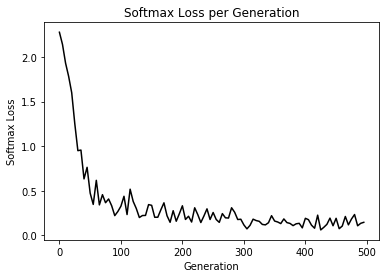

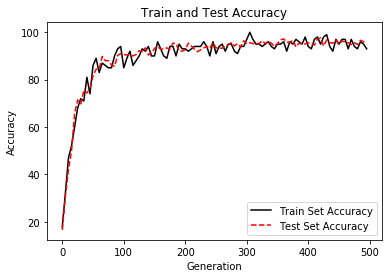

In [27]:

eval_indices = range(0, generations, eval_every)
# Plot loss over time
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Softmax Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Softmax Loss')
plt.show()
# Plot train and test accuracy
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()